# Function test

In [2]:
%pylab inline
import networkx as nx

Populating the interactive namespace from numpy and matplotlib


In [115]:
def get_neighbours_list(G,node):
    adj = [(n,nbrdict) for n, nbrdict in G.adjacency() if n==node]
    return list(adj[0][1].keys())
def death_birth_fitness(G,node):
    b = 10
    c = 1
    w=0.01
    C_fitness = D_fitness = 0
    # get all neighbours of cell
    neighbours = get_neighbours_list(G,node)
    for nbr in neighbours:
#         print(f'Neighbour {nbr} is {G.nodes[nbr]["name"]}')
        # find it's neighbours
        nbr_list = get_neighbours_list(G,nbr)
        num_C = num_D = 0
        for nb in nbr_list:
#             print(f'\tNeighbour {nb} is {G.nodes[nb]["name"]}')
            
            if G.nodes[nb]['name'] == 'C':
                num_C += 1
            elif G.nodes[nb]['name'] == 'D':
                num_D += 1
        if G.nodes[nbr]['name'] == 'C':
                C_fitness += 1-w+w*(num_C*b - c*(num_C+num_D))
        elif G.nodes[nbr]['name'] == 'D':
                D_fitness += 1-w+w*(num_C*b)
#         print(f'D fitness is { D_fitness }')
    fitnesses = [C_fitness, D_fitness]
    return np.array(fitnesses)#/sum(fitnesses)

In [6]:
edge_list = [
    (1,2),(1,4),(2,3),(2,7),
    (2,5),(2,6),(3,5),(3,6),
    (4,5),(4,7),(5,7),(5,10),
    (5,6),(5,11),(5,14),(7,8),
    (7,9),(9,10),(10,12),(10,13),
    (11,13),(11,14),(12,13)    
]
node_list = ['C','C','D','C','D','C','C','C','C','D','D','D','D','D']

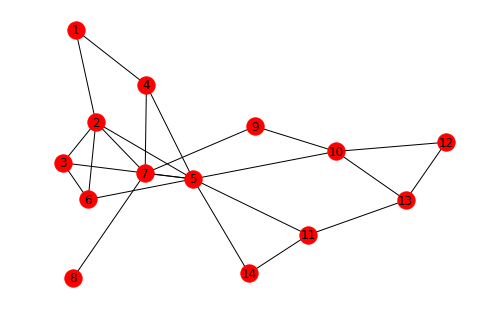

In [77]:
G = nx.Graph()
for index, player in enumerate(node_list):
    G.add_node(index+1, name=player)
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)

In [116]:
death_birth_fitness(G,5)

array([4.8 , 4.26])

In [87]:
4.26/(4.8+4.26)

0.4701986754966888

In [90]:
4*.99+.3

4.26

#### Calculate fixation probablity for a complete graph

In [9]:
b=10
c=1
w=0.01
def fitness_ratio(num_A):
    N = 100
    return (1-w+w*(b*num_A - N*c))/(1-w+w*(b*num_A))   

sum = 0
for i in range(100):
    sum += fitness_ratio(i+1)
1/(1+sum)

0.012923107606964827

In [1]:
added = sum([1/(10i+1-0.01) for i in range(100)])

In [2]:
1/(1+100*(1-added/10))

0.020355726571513952